**Bağımsız İki Örneklem T Testi (AB Testi)**

İki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

Varsayımlar:                                                                                      
    -Normallik                                                                                      
    -Varyans Homojenliği

**İş Uygulaması: ML Modelinin Başarı Testi**

Problem:                                                                                              
    Bir ML Projesine yatırım yapılmış. Ürettiği tahminler neticesinde oluşan gelir ile eski sistemin ürettiği gelirler
    karşılaştırılıp anlamlı farklılık olup olmadığını test edilmek isteniyor.                                         
Detaylar:                                                                                
    -Model geliştirilmiş ve web sitesine entegre edilmiş.                                                      
    -Site kullanıcıları belirli bir kurala göre ikiye bölümüş olsun.                                       
    -A grubu eski B grubu yeni sistem.                                                             
    -Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor.                                        

**Bağımsız İki Örneklem T Testi (AB Testi)**

HO: m1 = m2

H1: m1!= m2

In [4]:
#Veri Tipi 1

In [6]:
import pandas as pd
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B =pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

A_B = pd.concat([A, B], axis=1)
A_B.columns=["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [7]:
# Veri Tipi 2

In [13]:
import numpy as np

A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B =pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] ="A"
A = pd.concat([A, GRUP_A], axis=1)

#B ve B'nin grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] ="B"
B = pd.concat([B, GRUP_B], axis=1)

#Tüm Veri
AB = pd.concat([A,B])
AB.columns=["Gelir","Grup"]
print(AB.head())
print()
print(AB.tail())


   Gelir Grup
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A

    Gelir Grup
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


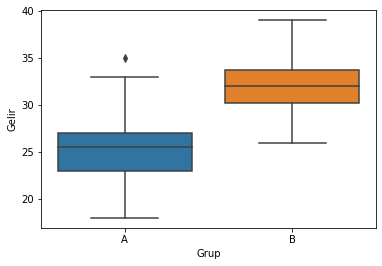

In [14]:
import seaborn as sns
sns.boxplot(x="Grup", y="Gelir", data=AB);

**Varsayım Kontrolü**

In [17]:
AB.head()

,Gelir,Grup
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [16]:
#normallik  varsayımı

In [18]:
from scipy.stats import shapiro
shapiro(A_B.A) #ilk grup için varsayım sağlanmaktadır. RED YOK

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [20]:
shapiro(A_B.B) #ikinci grubumuz için de varsayım sağlanmaktadır. RED YOK 

ShapiroResult(statistic=0.9561260342597961, pvalue=0.24584221839904785)

**Varyans Homejenliği Varsayımı**

HO: Varyanslar homejendir.

H1: Varyanslar homojen değildir.

In [25]:
import scipy.stats as stats
stats.levene(A_B.A, A_B.B) #pvalue değeri H0'ın reddedilemeyeceğni söylüyor.

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

**Hipotez Testi**

In [28]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True) #pValue değeri 0,05'den çok küçük olduğu için hipotez testi reddedilir.
#Farklılık vardır.

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [32]:
test_istatistiği, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test istatistiği = %.4f, p_değeri= %.4f'% (test_istatistiği,pvalue))

#Yukarıdaki kodun aynısı fakat gösterilmesi daha kolay, anlaşılır!

Test istatistiği = -7.0287, p_değeri= 0.0000
